In [2]:
import pickle
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
DATA_PATH = os.path.realpath("../WESAD")

In [4]:
class Subject:

    def __init__(self, main_path, subject_number):
        self.name = f'S{subject_number}'
        self.subject_keys = ['signal', 'label', 'subject']
        self.signal_keys = ['chest', 'wrist']
        self.chest_keys = ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']
        self.wrist_keys = ['ACC', 'BVP', 'EDA', 'TEMP']
        with open(os.path.join(main_path, self.name) + '/' + self.name + '.pkl', 'rb') as file:
            self.data = pickle.load(file, encoding='latin1')
        self.labels = self.data['label']

    def get_wrist_data(self):
        data = self.data['signal']['wrist']
        return data

    def get_chest_data(self):
        return self.data['signal']['chest']

In [5]:
s10 = Subject(DATA_PATH, '10')

In [6]:
s10_wrist_data = s10.get_wrist_data()

In [7]:
len(s10_wrist_data['BVP'])

351744

In [8]:
s10_wrist_data['BVP'][:10]

array([[10.17],
       [12.04],
       [13.01],
       [13.07],
       [12.33],
       [10.99],
       [ 9.38],
       [ 7.82],
       [ 6.61],
       [ 5.91]])

# Data Preparation

**Wrist - Empatica E4**

ACC: three-axis acceleration (32 Hz)

BVP: blood volume pulse (64 Hz)

EDA: electrodermal activity (4 Hz)

TEMP: skin temperature (4 Hz)

In [9]:
len(s10_wrist_data['BVP'])

351744

In [10]:
# Turn e4-wrist-data into datafames

eda_df = pd.DataFrame(s10_wrist_data['EDA'], columns=['EDA'])
bvp_df = pd.DataFrame(s10_wrist_data['BVP'], columns=['BVP'])
acc_df = pd.DataFrame(s10_wrist_data['ACC'], columns=['ACC_x', 'ACC_y', 'ACC_z'])
temp_df = pd.DataFrame(s10_wrist_data['TEMP'], columns=['TEMP'])
label_df = pd.DataFrame(s10.labels, columns=['label'])

In [11]:
label_df.value_counts()

label
0        1589000
1         826000
4         557200
2         507500
3         260400
7          39900
5          35700
6          31500
Name: count, dtype: int64

In [12]:
label_df.value_counts()

label
0        1589000
1         826000
4         557200
2         507500
3         260400
7          39900
5          35700
6          31500
Name: count, dtype: int64

In [13]:
len(label_df)

3847200

In [14]:
label_df_clean = label_df[label_df['label'].isin([1,2,3])]

In [15]:
label_df_bsa = label_df_clean['label'].map({1: 'neutral', 2: 'stress', 3: 'amusement'})
label_df_binary = label_df_clean['label'].map({1: 'non-stress', 2: 'stress', 3: 'non-stress'})

In [16]:
label_df_bsa.value_counts()

label
neutral      826000
stress       507500
amusement    260400
Name: count, dtype: int64

In [17]:
label_df_binary.value_counts()

label
non-stress    1086400
stress         507500
Name: count, dtype: int64

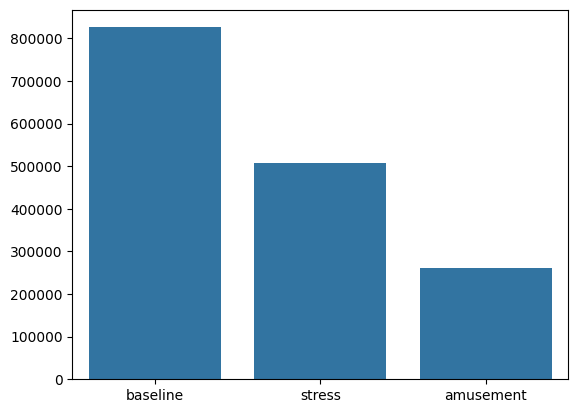

In [18]:
baseline_indices = label_df[label_df['label'] == 1]
stress_indices = label_df[label_df['label'] == 2]
amusement_indices = label_df[label_df['label'] == 3]
label = ["baseline", "stress", "amusement"]
y_ax = [len(baseline_indices), len(stress_indices), len(amusement_indices)]
bsa_barplot = sns.barplot(x=label, y=y_ax)
fig = bsa_barplot.get_figure()
fig.savefig("bsa_barplot.png") 

In [19]:
max(y_ax)

826000

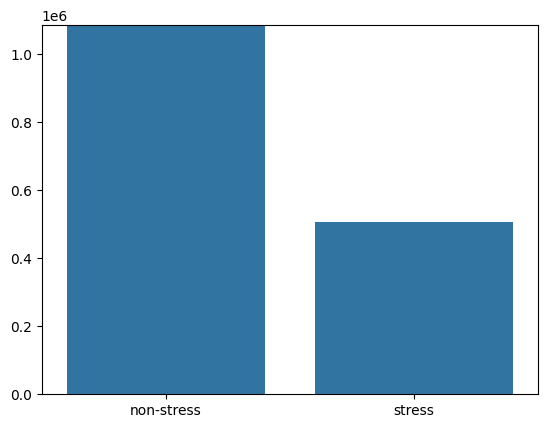

In [20]:
label = ["non-stress", "stress"]
y_ax = [len(baseline_indices)+ len(amusement_indices), len(stress_indices)]
plt.ylim(0, max(y_ax))
nss_barplot = sns.barplot(x=label, y=y_ax)
fig = nss_barplot.get_figure()
fig.savefig("nss_barplot.png") 

In [21]:
# DATA 

In [22]:
frequency_dict = {'ACC': 32, 'BVP': 64, 'EDA': 4, 'TEMP': 4, 'label': 64}

In [23]:
eda_df.index = [(1 / frequency_dict['EDA']) * i for i in range(len(eda_df))]
bvp_df.index = [(1 / frequency_dict['BVP']) * i for i in range(len(bvp_df))]
acc_df.index = [(1 / frequency_dict['ACC']) * i for i in range(len(acc_df))]
temp_df.index = [(1 / frequency_dict['TEMP']) * i for i in range(len(temp_df))]
label_df.index = [(1 / frequency_dict['label']) * i for i in range(len(label_df))]

In [24]:
eda_df.index = pd.to_datetime(eda_df.index, unit='s')
bvp_df.index = pd.to_datetime(bvp_df.index, unit='s')
temp_df.index = pd.to_datetime(temp_df.index, unit='s')
acc_df.index = pd.to_datetime(acc_df.index, unit='s')
label_df.index = pd.to_datetime(label_df.index, unit='s')

In [25]:
bvp_df.index

DatetimeIndex([       '1970-01-01 00:00:00', '1970-01-01 00:00:00.015625',
               '1970-01-01 00:00:00.031250', '1970-01-01 00:00:00.046875',
               '1970-01-01 00:00:00.062500', '1970-01-01 00:00:00.078125',
               '1970-01-01 00:00:00.093750', '1970-01-01 00:00:00.109375',
               '1970-01-01 00:00:00.125000', '1970-01-01 00:00:00.140625',
               ...
               '1970-01-01 01:31:35.843750', '1970-01-01 01:31:35.859375',
               '1970-01-01 01:31:35.875000', '1970-01-01 01:31:35.890625',
               '1970-01-01 01:31:35.906250', '1970-01-01 01:31:35.921875',
               '1970-01-01 01:31:35.937500', '1970-01-01 01:31:35.953125',
               '1970-01-01 01:31:35.968750', '1970-01-01 01:31:35.984375'],
              dtype='datetime64[ns]', length=351744, freq=None)

In [26]:
# Combined dataframe - not used yet
df = eda_df.join(bvp_df, how='outer')
df = df.join(temp_df, how='outer')
df = df.join(acc_df, how='outer')
df = df.join(label_df, how='outer')
df['label'] = df['label'].fillna(method='bfill')
df.reset_index(drop=True, inplace=True)

df[3847190:]

/var/folders/lw/14dpn8b91z99svtdtfqnx09800tlp4/T/ipykernel_72457/2536637065.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['label'] = df['label'].fillna(method='bfill')


,EDA,BVP,TEMP,ACC_x,ACC_y,ACC_z,label
3847190,NaN,NaN,NaN,NaN,NaN,NaN,0
3847191,NaN,NaN,NaN,NaN,NaN,NaN,0
3847192,NaN,NaN,NaN,NaN,NaN,NaN,0
3847193,NaN,NaN,NaN,NaN,NaN,NaN,0
3847194,NaN,NaN,NaN,NaN,NaN,NaN,0
3847195,NaN,NaN,NaN,NaN,NaN,NaN,0
3847196,NaN,NaN,NaN,NaN,NaN,NaN,0
3847197,NaN,NaN,NaN,NaN,NaN,NaN,0
3847198,NaN,NaN,NaN,NaN,NaN,NaN,0
3847199,NaN,NaN,NaN,NaN,NaN,NaN,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847200 entries, 0 to 3847199
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   EDA     float64
 1   BVP     float64
 2   TEMP    float64
 3   ACC_x   float64
 4   ACC_y   float64
 5   ACC_z   float64
 6   label   int32  
dtypes: float64(6), int32(1)
memory usage: 190.8 MB


In [28]:
test_df = df.loc[ : , df.columns != 'label']

In [29]:
test_df.describe()

,EDA,BVP,TEMP,ACC_x,ACC_y,ACC_z
count,21984.000000,351744.000000,21984.000000,175872.000000,175872.00000,175872.000000
mean,0.981519,0.000452,33.430048,42.882437,-1.07199,17.579854
std,0.766773,46.252525,0.971530,18.481615,21.96079,32.024483
min,0.266335,-609.230000,30.810000,-74.000000,-128.00000,-96.000000
25%,0.418290,-12.360000,32.930000,26.000000,-17.00000,-12.000000
50%,0.472282,2.530000,33.660000,48.000000,3.00000,12.000000
75%,1.371709,12.740000,34.180000,59.000000,8.00000,53.000000
max,3.507541,779.690000,34.710000,127.000000,80.00000,127.000000


<Axes: >

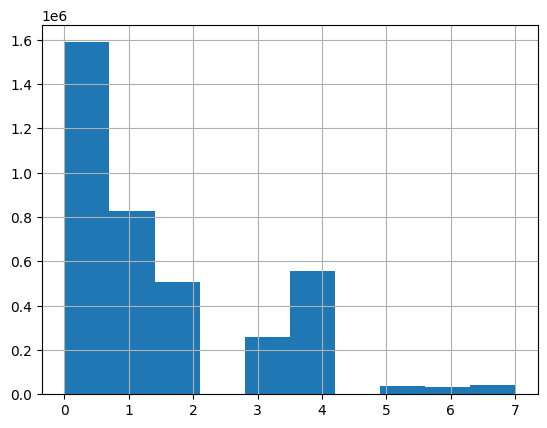

In [30]:
df['label'].hist()

**TODO**:
Adjust Datatypes for memory optimization

array([[<Axes: title={'center': 'EDA'}>, <Axes: title={'center': 'BVP'}>,
        <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'ACC_x'}>,
        <Axes: title={'center': 'ACC_y'}>,
        <Axes: title={'center': 'ACC_z'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >, <Axes: >]],
      dtype=object)

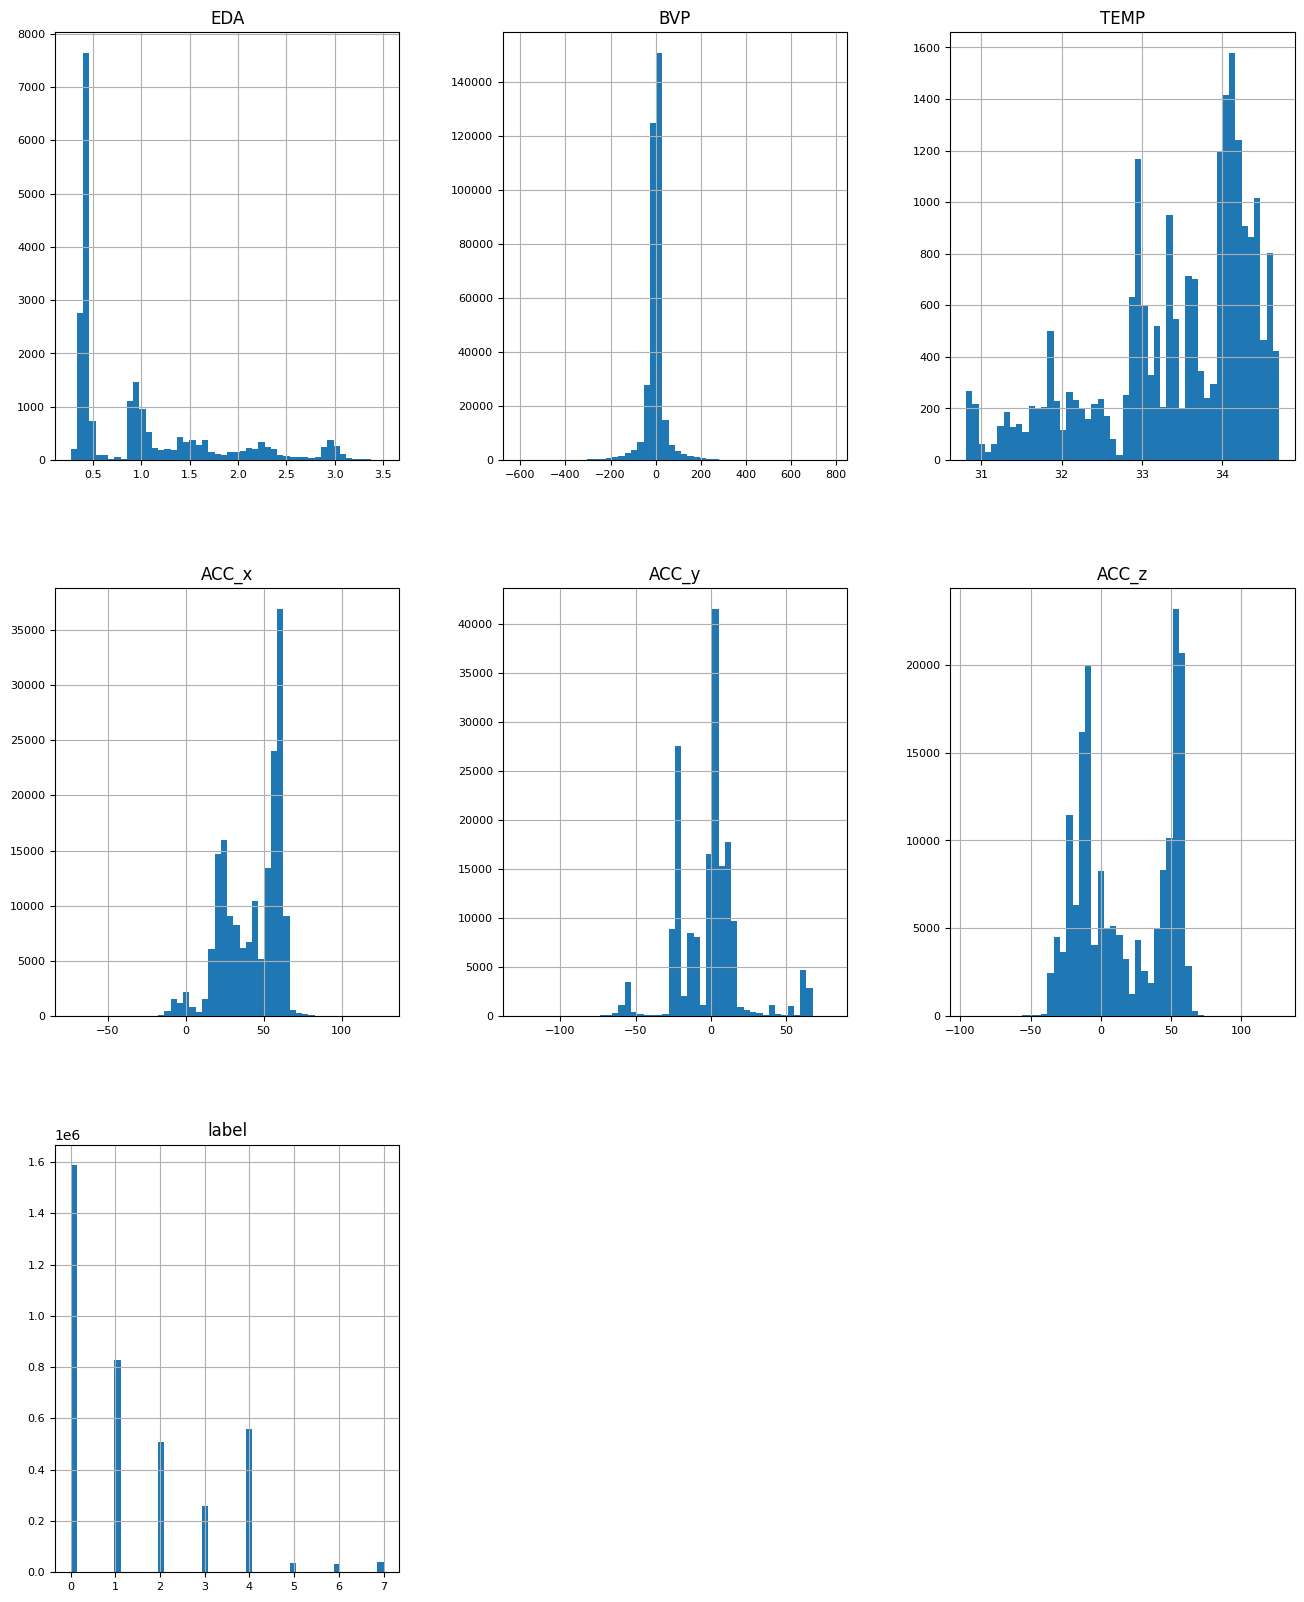

In [31]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<Axes: >

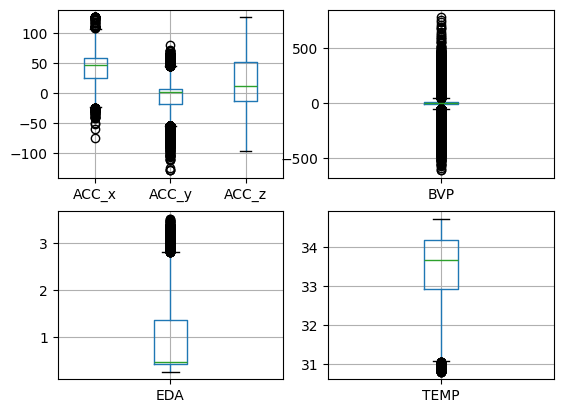

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df.boxplot(column=['ACC_x','ACC_y','ACC_z'], ax=axes[0,0])
df.boxplot(column=['BVP'], ax=axes[0,1])
df.boxplot(column=['EDA'], ax=axes[1,0])
df.boxplot(column=['TEMP'], ax=axes[1,1])

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)

IQR is
 EDA       0.953419
BVP      25.100000
TEMP      1.250000
ACC_x    33.000000
ACC_y    25.000000
ACC_z    65.000000
label     2.000000
dtype: float64


In [34]:
df.describe()

,EDA,BVP,TEMP,ACC_x,ACC_y,ACC_z,label
count,21984.000000,351744.000000,21984.000000,175872.000000,175872.00000,175872.000000,3.847200e+06
mean,0.981519,0.000452,33.430048,42.882437,-1.07199,17.579854,1.429039e+00
std,0.766773,46.252525,0.971530,18.481615,21.96079,32.024483,1.631451e+00
min,0.266335,-609.230000,30.810000,-74.000000,-128.00000,-96.000000,0.000000e+00
25%,0.418290,-12.360000,32.930000,26.000000,-17.00000,-12.000000,0.000000e+00
50%,0.472282,2.530000,33.660000,48.000000,3.00000,12.000000,1.000000e+00
75%,1.371709,12.740000,34.180000,59.000000,8.00000,53.000000,2.000000e+00
max,3.507541,779.690000,34.710000,127.000000,80.00000,127.000000,7.000000e+00


In [36]:
test_df = df.loc[ : , df.columns != 'label']

Clean data by outliers.

In [37]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [38]:
df.describe()

,EDA,BVP,TEMP,ACC_x,ACC_y,ACC_z,label
count,16672.000000,301453.000000,16672.000000,144121.000000,144121.000000,144121.000000,3.725509e+06
mean,0.890678,0.499859,33.433085,45.544355,-2.957605,17.899952,1.340696e+00
std,0.616791,17.487096,0.950832,16.366607,14.596968,33.054151,1.490459e+00
min,0.267614,-50.010000,31.070000,-23.000000,-54.000000,-96.000000,0.000000e+00
25%,0.422394,-10.250000,32.910000,30.000000,-14.000000,-13.000000,0.000000e+00
50%,0.462048,2.640000,33.660000,52.000000,3.000000,13.000000,1.000000e+00
75%,1.188787,11.520000,34.230000,61.000000,6.000000,54.000000,2.000000e+00
max,2.796694,50.390000,34.710000,108.000000,45.000000,91.000000,5.000000e+00


<Axes: >

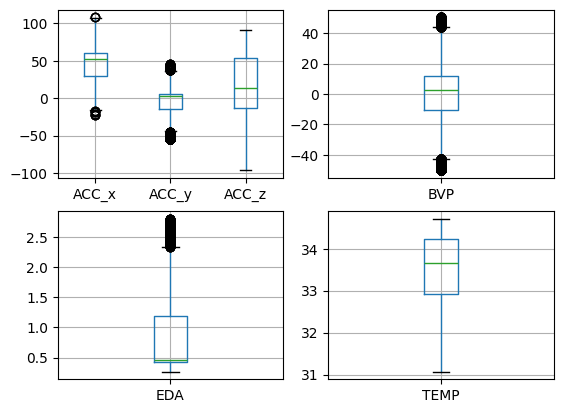

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df.boxplot(column=['ACC_x','ACC_y','ACC_z'], ax=axes[0,0])
df.boxplot(column=['BVP'], ax=axes[0,1])
df.boxplot(column=['EDA'], ax=axes[1,0])
df.boxplot(column=['TEMP'], ax=axes[1,1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725509 entries, 1 to 3847199
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   EDA     float64
 1   BVP     float64
 2   TEMP    float64
 3   ACC_x   float64
 4   ACC_y   float64
 5   ACC_z   float64
 6   label   int32  
dtypes: float64(6), int32(1)
memory usage: 213.2 MB


array([[<Axes: title={'center': 'EDA'}>, <Axes: title={'center': 'BVP'}>,
        <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'ACC_x'}>,
        <Axes: title={'center': 'ACC_y'}>,
        <Axes: title={'center': 'ACC_z'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >, <Axes: >]],
      dtype=object)

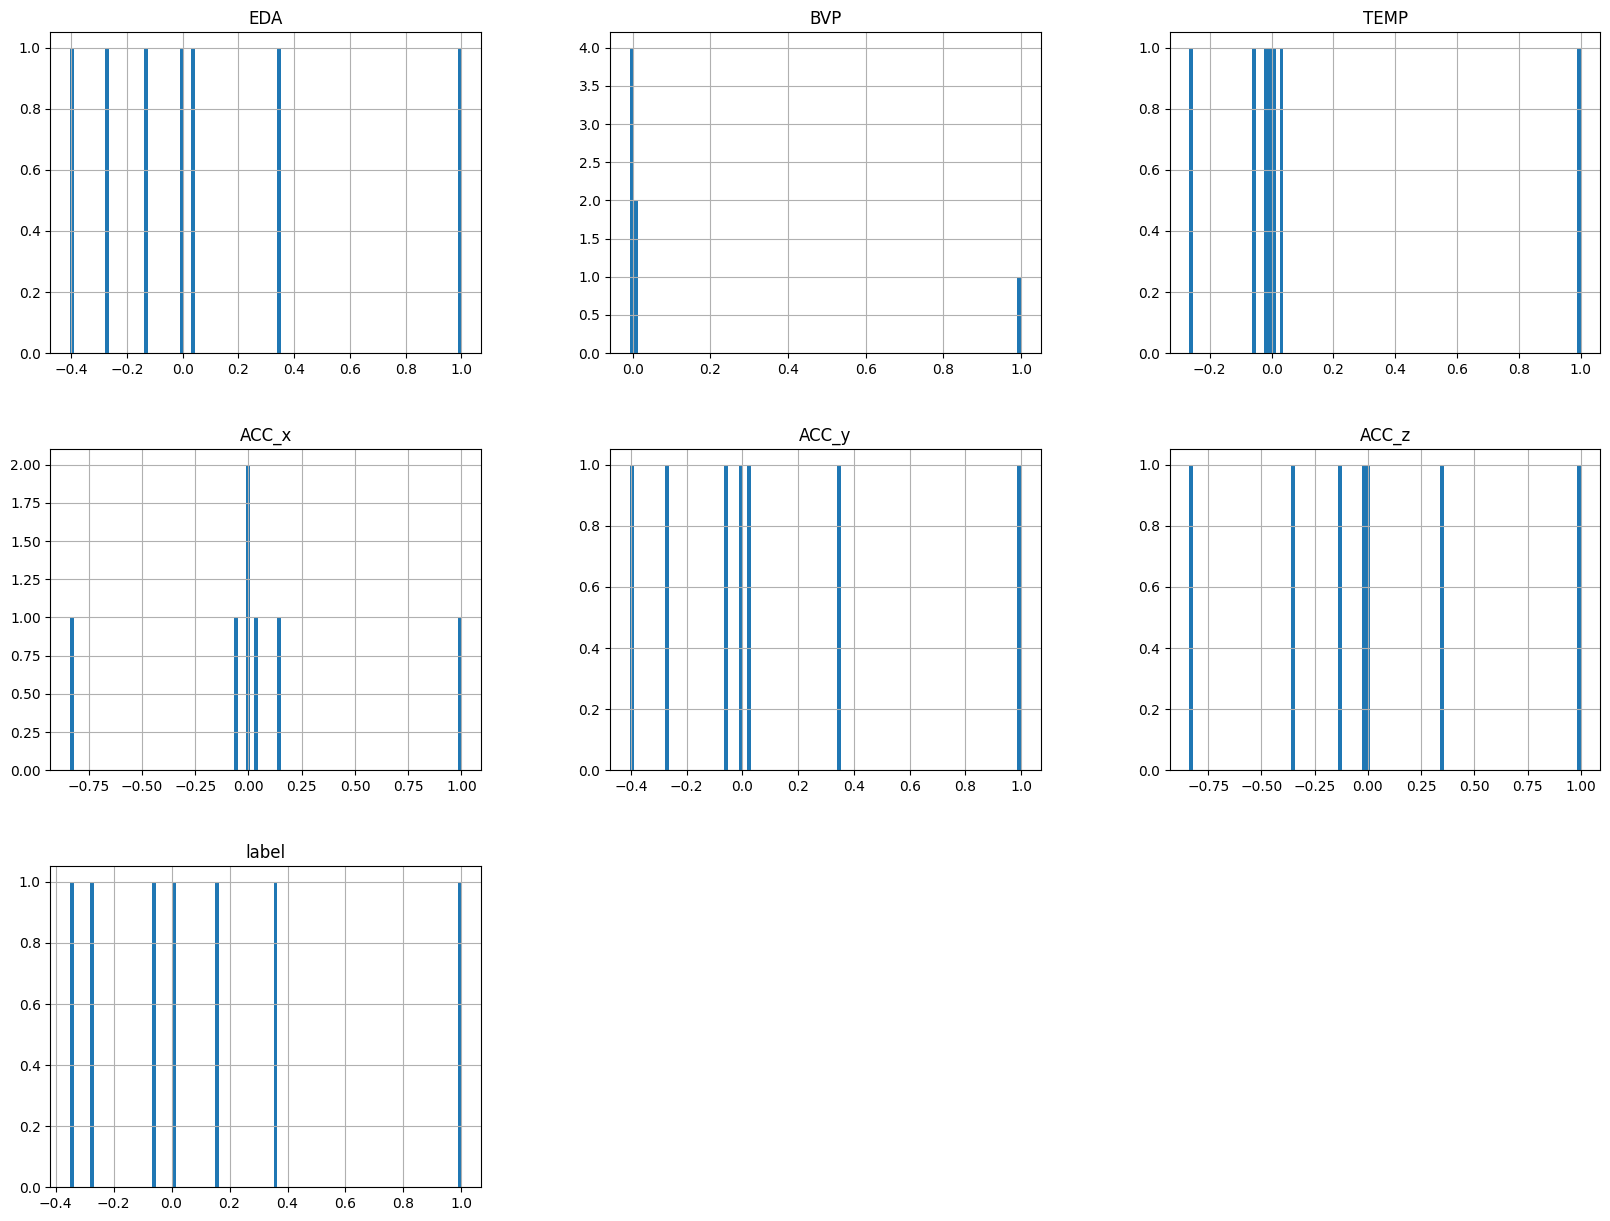

In [43]:
corr_matrix=df.corr()
# corr_matrix ["c_ax"].sort_values(ascending=False)
(corr_matrix).hist(bins=100, figsize = (20,15))

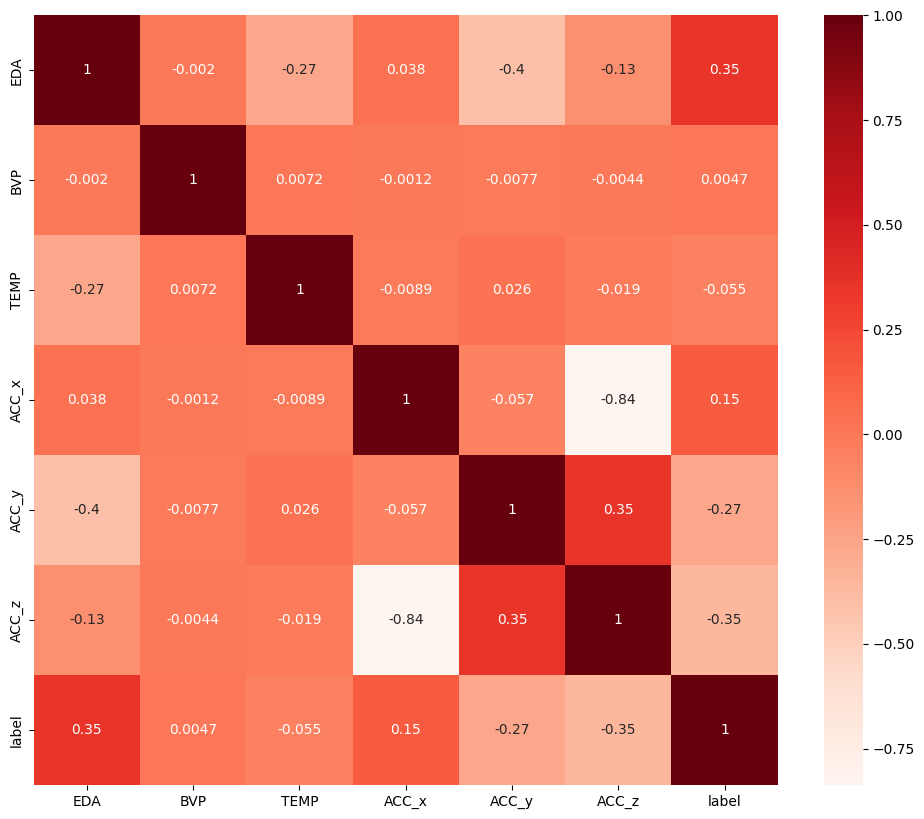

In [48]:
plt.figure(figsize=(12,10))
corr_matrix=df.corr()
#corr_matrix ["c_ax"].sort_values(ascending=False)
(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [50]:
norm_df = (df-df.mean())/df.std()

In [51]:
norm_y = df['label']

In [52]:
norm_x = norm_df.drop('label',axis=1)

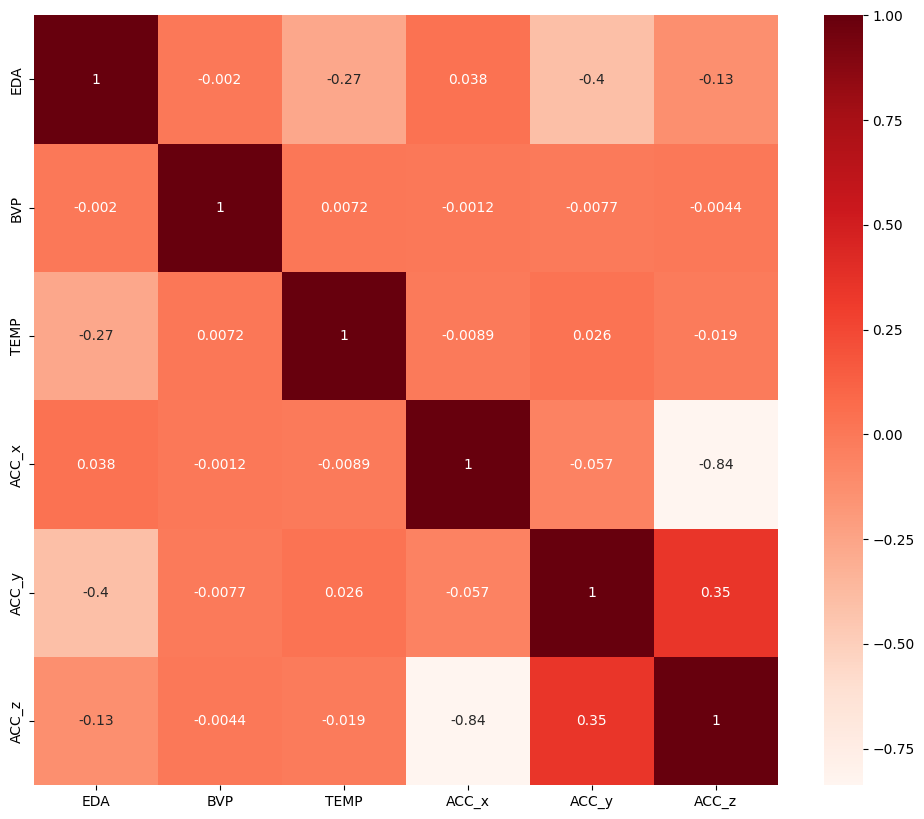

In [53]:
plt.figure(figsize=(12,10))
cor = norm_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()